<a href="https://colab.research.google.com/github/AmazingGrace-D/SimpleRNN/blob/main/SimpleRNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, SimpleRNN
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam, SGD

In [3]:
series = np.sin(0.1 * np.arange(200)) + #np.random.randn(200) * 0.1

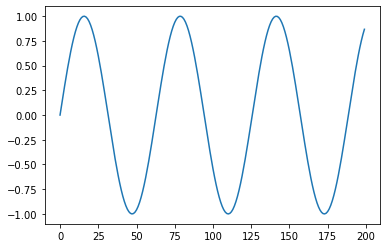

In [4]:
plt.plot(series)

In [5]:
# Using previous 10 points to predict the next point

T = 10
X = []
Y = []

for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T, 1) # Shape N x T x D
Y = np.array(Y)
N = len(X)
print(X.shape)


print(Y.shape)

(190, 10, 1)
(190,)


In [23]:
#Model

i = Input(shape = (T, 1))
x = SimpleRNN(5)(i) # activation is automatically tanh
x = Dense(1)(x)

model = Model(i, x)

model.compile(
    loss = 'mse',
    optimizer = Adam(lr = 0.1)
)

r = model.fit(X[:-N//2], Y[:-N//2],
              epochs = 150,
              validation_data = (X[-N//2:], Y[-N//2:]))

Epoch 1/150
3/3 [==============================] - 1s 111ms/step - loss: 0.7151 - val_loss: 0.2426
Epoch 2/150
3/3 [==============================] - 0s 21ms/step - loss: 0.1949 - val_loss: 0.0232
Epoch 3/150
3/3 [==============================] - 0s 24ms/step - loss: 0.0335 - val_loss: 0.0634
Epoch 4/150
3/3 [==============================] - 0s 20ms/step - loss: 0.0337 - val_loss: 0.0189
Epoch 5/150
3/3 [==============================] - 0s 21ms/step - loss: 0.0203 - val_loss: 0.0155
Epoch 6/150
3/3 [==============================] - 0s 21ms/step - loss: 0.0110 - val_loss: 0.0192
Epoch 7/150
3/3 [==============================] - 0s 123ms/step - loss: 0.0129 - val_loss: 0.0151
Epoch 8/150
3/3 [==============================] - 0s 21ms/step - loss: 0.0093 - val_loss: 0.0077
Epoch 9/150
3/3 [==============================] - 0s 21ms/step - loss: 0.0078 - val_loss: 0.0037
Epoch 10/150
3/3 [==============================] - 0s 21ms/step - loss: 0.0035 - val_loss: 0.0055
Epoch 11/150
3/3 

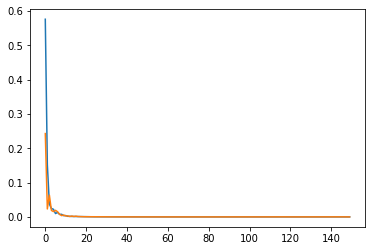

In [24]:
# visualise loss

plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')

In [25]:
# Wrong way of forecasting with true values

validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1, 1))[0, 0]
  i += 1
  validation_predictions.append(p)


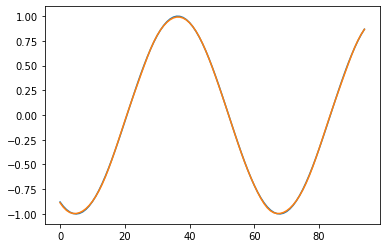

In [26]:
plt.plot(validation_target, label = 'validation_target')
plt.plot(validation_predictions, label = 'validation_predictions')

In [27]:
 # Forecasting the right way

 validation_target = Y[-N//2:]
 validation_predictions = []

 last_x = X[-N//2]

 while len(validation_predictions) < len(validation_target):
   p = model.predict(last_x.reshape(1, -1, 1))[0, 0]
   validation_predictions.append(p)

   last_x = np.roll(last_x, -1)
   last_x[-1] = p
   

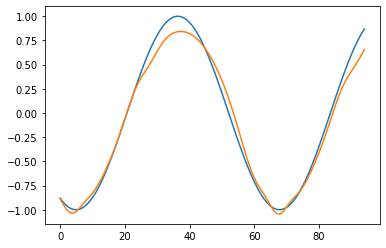

In [28]:
plt.plot(validation_target, label='validation_target')
plt.plot(validation_predictions, label='validation_predictions')

Note that this is a smooth data. You might want to try different activation functions and also set activation to 'None' till desired/acceptable result is achieved